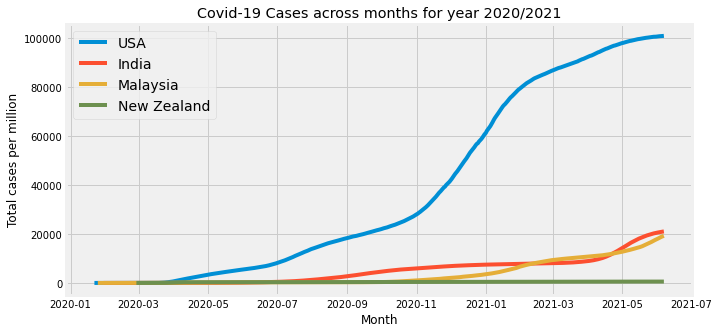

In [18]:
# Collated total code to produce a line graph of Cases/Million vs Months

# Standard imports for pandas, numpy, and matplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

# Reading the dataframe
df = pd.read_csv('C19 Data.csv', 
                 parse_dates = ["date"]) #change date to datetimens64


# Data for cases/million, saving from 'df' to a new_df variable
new_df = df.groupby(["location", "iso_code", "date"])["total_cases_per_million"].max().reset_index()
new_df

# Sets new variables for different countries, grouping by the date
USA = new_df[new_df["location"] == "United States"].groupby(['date']).sum()
India = new_df[new_df["location"] == "India"].groupby(['date']).sum()
MY = new_df[new_df["location"] == "Malaysia"].groupby(["date"]).sum()
NZ = new_df[new_df['location'] == 'New Zealand'].groupby(['date']).sum()

fig = figure(figsize = (10,5))
ax = fig.add_subplot(111) 
plt.style.use('fivethirtyeight')

# Plots the line graph and sets the x/y axis labels and graph title
ax.plot(USA[['total_cases_per_million']], label = "USA")
ax.plot(India[['total_cases_per_million']], label = 'India')
ax.plot(MY[["total_cases_per_million"]], label = "Malaysia")
ax.plot(NZ[["total_cases_per_million"]], label = "New Zealand")
ax.set_xlabel("Month")
ax.set_ylabel('Total cases per million')
ax.title.set_text('Covid-19 Cases across months for year 2020/2021')

# creates the legend
plt.legend()

# Shows the image, then save it
plt.show()
fig.savefig('Total_cases per million.png')

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

df = pd.read_csv('C19 Data.csv', 
                 parse_dates = ["date"]) #change date to datetimens64

In [4]:
df = pd.read_csv('C19 Data.csv', 
                 parse_dates = ["date"]) #change date to datetimens64

In [ ]:
#convert str to datetime64 format
#df['date'] = pd.to_datetime(df['date'],  format='%Y-%m-%d')

#change date display format from YMD to DMY
#df['date'] = df['date'].dt.strftime('%d-%m-%Y')

#df['date'] = df['date'].dt.strftime('%Y-%m-%d')

#df['date'] = pd.to_datetime(df['date'],  format='%d-%m-%Y')

In [5]:
#df.head(10)
df.info()
#df.isnull().sum() 
#df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94158 entries, 0 to 94157
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   iso_code                               94158 non-null  object        
 1   continent                              89705 non-null  object        
 2   location                               94158 non-null  object        
 3   date                                   94158 non-null  datetime64[ns]
 4   total_cases                            91157 non-null  float64       
 5   new_cases                              91154 non-null  float64       
 6   new_cases_smoothed                     90144 non-null  float64       
 7   total_deaths                           81202 non-null  float64       
 8   new_deaths                             81357 non-null  float64       
 9   new_deaths_smoothed                    90144 non-null  float6

In [9]:
# Data for cases/million
new_df = df.groupby(["location", "iso_code", "date"])["total_cases_per_million"].max().reset_index()
new_df

,location,iso_code,date,total_cases_per_million
0,Afghanistan,AFG,2020-02-24,0.026
1,Afghanistan,AFG,2020-02-25,0.026
2,Afghanistan,AFG,2020-02-26,0.026
3,Afghanistan,AFG,2020-02-27,0.026
4,Afghanistan,AFG,2020-02-28,0.026
...,...,...,...,...
94153,Zimbabwe,ZWE,2021-06-03,2630.168
94154,Zimbabwe,ZWE,2021-06-04,2633.667
94155,Zimbabwe,ZWE,2021-06-05,2635.282
94156,Zimbabwe,ZWE,2021-06-06,2636.695


In [ ]:
# Data for total cases
new_df2 = df.groupby("date").dt.month_name().rename("month").groupby(["location", "iso_code", ])["total_cases"].max().reset_index()
new_df2

In [10]:
USA = new_df[new_df["location"] == "United States"].groupby(['date']).sum()
India = new_df[new_df["location"] == "India"].groupby(['date']).sum()
MY = new_df[new_df["location"] == "Malaysia"].groupby(["date"]).sum()
NZ = new_df[new_df['location'] == 'New Zealand'].groupby(['date']).sum()

In [11]:
USA.tail()

,total_cases_per_million
date,
2021-06-03,100683.295
2021-06-04,100734.231
2021-06-05,100776.248
2021-06-06,100792.547
2021-06-07,100839.363


In [ ]:
# for Total Cases
fig = figure(figsize = (10,8))
ax = fig.add_subplot(111) 
#plt.style.use('fivethirtyeight')

ax.plot(USA[['total_cases']], label = "USA")
ax.plot(India[['total_cases']], label = 'India')
ax.plot(MY[["total_cases"]], label = "Malaysia")
ax.plot(NZ[["total_cases"]], label = "New Zealand")
ax.set_xlabel("Month")
ax.set_ylabel('Total cases in millions')
ax.title.set_text('Covid-19 Cases for USA, India, Malaysia, and New Zealand across months')

plt.legend()

plt.show()
fig.savefig('Total cases.png')